In [83]:
import re
import bs4
import json
import pandas as pd
from tqdm import tqdm
from glob import glob
from bs4 import BeautifulSoup

In [2]:
origins = glob("./data/origin/*.json")
origins

['./data/origin/홍대 회식 맛집.json',
 './data/origin/홍대 데이트 맛집.json',
 './data/origin/성수 데이트 맛집.json',
 './data/origin/압구정 회식 맛집.json',
 './data/origin/강남역 데이트 맛집.json',
 './data/origin/영등포 회식 맛집.json',
 './data/origin/성수 회식 맛집.json',
 './data/origin/압구정 데이트 맛집.json',
 './data/origin/강남역 회식 맛집.json',
 './data/origin/범계 회식 맛집.json',
 './data/origin/범계 데이트 맛집.json',
 './data/origin/영등포 데이트 맛집.json']

In [86]:
with open(origins[0], "r", encoding='utf-8') as f:
    blog = json.load(f)

In [128]:
idx = 10

{'title': '<b>홍대</b> 오성계 : 역대급... 맛볼수 있는 상수 <b>회식</b>장소 <b>맛집</b>',
 'url': 'https://blog.naver.com/ndh0417/223168264332',
 'blog_name': '감미로운 먹보',
 'date': '20230728',
 'origin_source': '<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36 Edg/117.0.2045.31"><head>\n<meta http-equiv="Pragma" content="no-cache">\n<meta http-equiv="Expires" content="-1">\n\n\n<meta name="referrer" content="always">\n\n\n\n\n\n\n\n<!--[if ie]>\n<style type="text/css">\nhtml {overflow: scroll; overflow-x: auto;}\n</style>\n<![endif]-->\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/t.static.blog/mylog/versioning/LayoutTopCommon-358144226_https.css" charset="UTF-8">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/t.static.blog/mylog/versioning//common/css/music/player-d3fc09e_https.css">\n\n<link rel="shortcut icon" type="image/x-icon" href="/favicon.ico?3">\n\n\n\n\n\n 
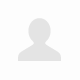
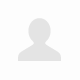

In [129]:
blog[idx]

In [130]:
blog[idx]['url']

'https://blog.naver.com/ndh0417/223168264332'

In [131]:
comment_code = re.compile(r'<!--.*?-->')

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36 Edg/117.0.2045.31" lang="ko"><head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="always" name="referrer"/>
<!--[if ie]>
<style type="text/css">
html {overflow: scroll; overflow-x: auto;}
</style>
<![endif]-->
<link charset="UTF-8" href="https://ssl.pstatic.net/t.static.blog/mylog/versioning/LayoutTopCommon-358144226_https.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/t.static.blog/mylog/versioning//common/css/music/player-d3fc09e_https.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<meta content="홍대 오성계 : 역대급 닭특수부위를 맛볼수 있는 상수 회식장소 맛집" property="og:title"/>
<meta content="https://blogthumb.pstatic.net/MjAyMzA3MjhfMzAw/MDAxNjkwNTAxOTE5NTUy.4SQi-yHuBD0s7y-D7a_DuSDax80BS3e08BUi5utjKaUg.rAYLYOc8jlE7eR0twg2cxr-
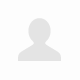
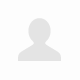

In [132]:
soup = BeautifulSoup(comment_code.sub('', blog[idx]['origin_source']), 'html.parser')
soup

In [133]:
# 프로필 정보
soup.find_all('p', {"class": "caption align"})

[<p class="caption align"> <span class="itemfont col">안녕하세요 저는 이곳저곳을 여행하면서 먹부림하는 먹보입니다 다양한 장소를 리뷰하고 있어요!☺️</span> </p>]

In [134]:
# 게시글 갯수 div.cm-con
soup.find_all('span', {"class": "num cm-col1"})

[<span class="num cm-col1">(529)</span>]

In [103]:
# 공감수
soup.find_all('em', {"class": "u_cnt _count"})

# 댓글수
# soup.find_all('em', {"class": "_commentCount"})

# soup.find_all('em', {"id": "commentCount"})

[<em class="u_cnt _count"></em>,
 <em class="u_cnt _count"></em>,
 <em class="u_cnt _count"></em>]

In [104]:
# Hashtags
soup.find_all("a", {"class": "item pcol2 itemTagfont _setTop"})

[<a class="item pcol2 itemTagfont _setTop" href="/PostListByTagName.naver?blogId=shuenmama&amp;logType=mylog&amp;tagName=%ED%99%8D%EB%8C%80%EA%B3%A0%EA%B8%B0%EC%A7%91" onclick="nclk_v2(this,'tag.list','','')"><span class="ell">#홍대고기집</span><i class="pcol2b"></i></a>,
 <a class="item pcol2 itemTagfont _setTop" href="/PostListByTagName.naver?blogId=shuenmama&amp;logType=mylog&amp;tagName=%ED%99%8D%EB%8C%80%EA%B3%A0%EA%B8%B0%EC%A7%91%EB%A7%9B%EC%A7%91" onclick="nclk_v2(this,'tag.list','','')"><span class="ell">#홍대고기집맛집</span><i class="pcol2b"></i></a>,
 <a class="item pcol2 itemTagfont _setTop" href="/PostListByTagName.naver?blogId=shuenmama&amp;logType=mylog&amp;tagName=%ED%99%8D%EB%8C%80" onclick="nclk_v2(this,'tag.list','','')"><span class="ell">#홍대</span><i class="pcol2b"></i></a>,
 <a class="item pcol2 itemTagfont _setTop" href="/PostListByTagName.naver?blogId=shuenmama&amp;logType=mylog&amp;tagName=%EA%B3%A0%EA%B8%B0%EC%A7%91" onclick="nclk_v2(this,'tag.list','','')"><span class="el

In [120]:
# Map
soup.find_all("div", {"class": "se-placesMap"})[0]

<div class="se-component se-placesMap se-l-default __se-component" id="SE-6574151D-35D2-4E2E-A820-ED1C337F1617">
<div class="se-component-content">
<div class="se-section se-section-placesMap se-section-align-left se-l-default">
<div class="se-module se-module-map-image">
<img alt="" class="se-map-image egjs-visible" src="https://simg.pstatic.net/static.map/v2/map/staticmap.bin?caller=smarteditor&amp;markers=color%3A0x11cc73%7Csize%3Amid%7Cpos%3A126.9267%2037.556285%7CviewSizeRatio%3A0.7%7Ctype%3Ad&amp;w=848&amp;h=452&amp;scale=1&amp;dataversion=167.89"/>
</div>
<div class="se-module se-module-map-text">
<a class="se-map-info __se_link" data-linkdata='{"eventTarget" : "placeDesc", "placeId" : "1246697901", "searchEngine" : "naver", "searchType" : "s", "name" : "쟁반집8292 홍대점", "address" : "서울특별시 마포구 와우산로29길 66", "latitude" : "37.5562849", "longitude" : "126.9266996", "tel" : "02-325-8292", "bookingUrl" : "https://booking.naver.com/booking/6/bizes/824504" }' data-linktype="map" href="#" o

In [106]:
# Add post
len(soup.find_all("div", {"class": "ssp-adcontent"}))

3

In [126]:
# video
soup.find_all("div", {"class": "se-video"})[0]

<div class="se-component se-video se-l-default">
<div class="se-component-content se-component-content-fit">
<div class="se-section se-section-video se-section-align-left se-l-default">
<div class="se-module se-module-video __se-component" id="SE-6A89BDE8-48FA-4A95-BC92-8AC64646C4BF">
</div>
</div>
</div>
<script class="__se_module_data" data-module='{"type":"v2_video", "id" :"SE-6A89BDE8-48FA-4A95-BC92-8AC64646C4BF", "data" : { "videoType" : "player", "vid" : "EACB133FA3294F45BA9821591535C1B03BC8", "inkey" : "V126e39b1a022a180b1d6fb3666d035ce848eccede88360c47ae8da547d070950d505fb3666d035ce848e", "thumbnail": "https://phinf.pstatic.net/image.nmv/blog_2023_02_25_1532/1ab99b1b-b4f2-11ed-82a3-a0369ff85d28_04.jpg", "originalWidth": "1280", "originalHeight": "720", "width": "1280", "height": "720", "contentMode": "fit", "format": "unknown", "mediaMeta": {"@ctype":"mediaMeta","title":"홍대 고기집 쟁반에 가득 삼겹살 회식","tags":["홍대","고기집","삼겹살","회식","홍대고기집","홍대삼겹살","홍대회식"],"description":"홍대 고기집 쟁반에 가득 삼겹살

In [112]:
# gif
soup.find_all("video")[0].attrs

{'src': 'https://mblogvideo-phinf.pstatic.net/MjAyMzAyMjVfODEg/MDAxNjc3MzE3ODkwMTg5.HpyQzfrSKtbKBkKCwcvyPL6WfJbw45B31wyB8Gt16fEg.ox3vYlwjDapiUvbBqMcvQMepCiY3iDM1_FMyxMsrS74g.GIF.shuenmama/3098026155.gif?type=mp4w800',
 'loop': 'loop',
 'muted': 'muted',
 'playsinline': '',
 'class': ['_gifmp4', 'custom-se-image-video-resource', 'egjs-visible'],
 'data-gif-url': 'https://postfiles.pstatic.net/MjAyMzAyMjVfODEg/MDAxNjc3MzE3ODkwMTg5.HpyQzfrSKtbKBkKCwcvyPL6WfJbw45B31wyB8Gt16fEg.ox3vYlwjDapiUvbBqMcvQMepCiY3iDM1_FMyxMsrS74g.GIF.shuenmama/3098026155.gif?type=w773',
 'poster': 'https://postfiles.pstatic.net/MjAyMzAyMjVfODEg/MDAxNjc3MzE3ODkwMTg5.HpyQzfrSKtbKBkKCwcvyPL6WfJbw45B31wyB8Gt16fEg.ox3vYlwjDapiUvbBqMcvQMepCiY3iDM1_FMyxMsrS74g.GIF.shuenmama/3098026155.gif?type=w80_blur'}

In [110]:
attrs = []
for tag in tags:
    if isinstance(tag, bs4.element.NavigableString): continue
    attr = tag.attrs
    if attr.get('id'): attrs.append(attr['id'])
    
    attrs += attr.get('class', [])

In [111]:
attrs

['se-component-content',
 'se-component-content-fit',
 'se-section',
 'se-section-video',
 'se-section-align-left',
 'se-l-default',
 'SE-6A89BDE8-48FA-4A95-BC92-8AC64646C4BF',
 'se-module',
 'se-module-video',
 '__se-component',
 '__se_module_data']